# Fruits and vegetables detection

## Goal
- detect a single fruit or vegetable in an image
- detect multiple fruits and/or vegetables given an image

## Dataset
- fruits 360 - kaggle

## Project description
In this project, the idea is to create an object detection model, specifically to detect fruits/vegetables, and to do so, multiple approaches can be used. 
We can create a model instance and train the model with a subset of our dataset, and later evaluate its performance, or we can use a pre-trained model, such as a transformer, to perform the inference.
The different approaches have diverse pros and cons. For example:
- training from scratch: 
    - The model is likely to be more specific to our dataset's patterns (for example, if the majority or all of your images are in the same context, with pictures in simular environments).
    - If the dataset is not too big, and the training and testing images have different patterns and contexts, it can have a lower performance.
- Pre-trained models, transformers: 
    - To effectively perform the inference in our dataset, the model has to be trained in a dataset with images that contain the same objects as our dataset.
    - If the model was trained in a dataset with other objects and contexts, that differ from our dataset's, there can be a mix-up, and inference power can be affected.
    - It is likely that the transformer was trained in a large dataset, with multiple contexts, which can improve the predictive power of the model, and perhaps have a good performance in our dataset.
    
I intend to train a model and use it for inference in our dataset, and compare the results with a pre-trained model. 

Possible models:
- VGG-16: CNN for image recognition
- Mask RCNN: instance segmentation

## Performance metrics
If using a model with optimization-based training, like neural networks, the performance can be shown with the training and validation loss and accuracy. 
Object detection metrics can be used, such as the intersection over union of pixels (jaccard index).

## References
- 1) https://www.kaggle.com/datasets/moltean/fruits
- 2) https://www.kaggle.com/code/thepinokyo/fruit-detection-with-vgg-16
- 3) https://www.kaggle.com/code/shivamb/cnn-architectures-vgg-resnet-inception-tl
- 4) Ayyadevara, V. Kishore and Reddy, Yeshwanth. "Modern Computer Vision with PyTorch". Packt.
- 5) https://www.kaggle.com/code/rajmehra03/a-comprehensive-guide-to-transfer-learning
- 6) https://www.kaggle.com/code/abarbosa/tera-aula-deep-learning-4-transfer-learning
- 7) https://pytorch.org/vision/stable/models.html

In [6]:
import os, sys
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import plotly.express as px


In [3]:
import os
os.listdir('../input')

['fruits']

In [4]:
os.listdir('../input/fruits/fruits-360-original-size/fruits-360-original-size')

['Meta', 'Papers', 'Validation', 'Training', 'readme.md', 'Test']

In [5]:
os.listdir('../input/fruits/fruits-360_dataset/fruits-360')

['papers', 'LICENSE', 'Training', 'readme.md', 'test-multiple_fruits', 'Test']

In [6]:
os.listdir('../input/fruits/fruits-360_dataset/fruits-360/Training')

['Quince',
 'Grapefruit White',
 'Granadilla',
 'Orange',
 'Apple Red 3',
 'Grape White 2',
 'Corn Husk',
 'Tamarillo',
 'Banana Red',
 'Nectarine Flat',
 'Pepper Yellow',
 'Nut Forest',
 'Pear Monster',
 'Fig',
 'Tomato Heart',
 'Onion Red Peeled',
 'Lemon Meyer',
 'Onion Red',
 'Passion Fruit',
 'Cucumber Ripe',
 'Cactus fruit',
 'Tomato not Ripened',
 'Mango Red',
 'Apple Pink Lady',
 'Pomegranate',
 'Plum',
 'Pineapple',
 'Tomato 1',
 'Cherry 2',
 'Apple Red 2',
 'Avocado ripe',
 'Dates',
 'Maracuja',
 'Papaya',
 'Nut Pecan',
 'Pear Stone',
 'Cherry Wax Yellow',
 'Eggplant',
 'Apple Golden 2',
 'Guava',
 'Beetroot',
 'Tomato Maroon',
 'Potato Red',
 'Apple Red Delicious',
 'Cherry Wax Red',
 'Kiwi',
 'Cherry Wax Black',
 'Limes',
 'Cantaloupe 2',
 'Apple Braeburn',
 'Pear',
 'Carambula',
 'Tomato 3',
 'Onion White',
 'Cherry 1',
 'Strawberry',
 'Lychee',
 'Redcurrant',
 'Rambutan',
 'Potato Red Washed',
 'Tomato 4',
 'Hazelnut',
 'Tomato Yellow',
 'Plum 3',
 'Grape White',
 'Pineap

In [7]:
# lets see the kinds of fruits and vegetables that are present in the database
os.listdir('../input/fruits/fruits-360_dataset/fruits-360/Training')

['Quince',
 'Grapefruit White',
 'Granadilla',
 'Orange',
 'Apple Red 3',
 'Grape White 2',
 'Corn Husk',
 'Tamarillo',
 'Banana Red',
 'Nectarine Flat',
 'Pepper Yellow',
 'Nut Forest',
 'Pear Monster',
 'Fig',
 'Tomato Heart',
 'Onion Red Peeled',
 'Lemon Meyer',
 'Onion Red',
 'Passion Fruit',
 'Cucumber Ripe',
 'Cactus fruit',
 'Tomato not Ripened',
 'Mango Red',
 'Apple Pink Lady',
 'Pomegranate',
 'Plum',
 'Pineapple',
 'Tomato 1',
 'Cherry 2',
 'Apple Red 2',
 'Avocado ripe',
 'Dates',
 'Maracuja',
 'Papaya',
 'Nut Pecan',
 'Pear Stone',
 'Cherry Wax Yellow',
 'Eggplant',
 'Apple Golden 2',
 'Guava',
 'Beetroot',
 'Tomato Maroon',
 'Potato Red',
 'Apple Red Delicious',
 'Cherry Wax Red',
 'Kiwi',
 'Cherry Wax Black',
 'Limes',
 'Cantaloupe 2',
 'Apple Braeburn',
 'Pear',
 'Carambula',
 'Tomato 3',
 'Onion White',
 'Cherry 1',
 'Strawberry',
 'Lychee',
 'Redcurrant',
 'Rambutan',
 'Potato Red Washed',
 'Tomato 4',
 'Hazelnut',
 'Tomato Yellow',
 'Plum 3',
 'Grape White',
 'Pineap

In [8]:
train_dir = '../input/fruits/fruits-360_dataset/fruits-360/Training'
test_dir = '../input/fruits/fruits-360_dataset/fruits-360/Test'

In [9]:
n_classes = len(next(os.walk(train_dir))[1])
print('Quantity of objects: {}'.format(n_classes))

Quantity of objects: 131


In [10]:
# lets see the kinds of fruits and vegetables that are present in the database
np.array(os.listdir(train_dir))

array(['Quince', 'Grapefruit White', 'Granadilla', 'Orange',
       'Apple Red 3', 'Grape White 2', 'Corn Husk', 'Tamarillo',
       'Banana Red', 'Nectarine Flat', 'Pepper Yellow', 'Nut Forest',
       'Pear Monster', 'Fig', 'Tomato Heart', 'Onion Red Peeled',
       'Lemon Meyer', 'Onion Red', 'Passion Fruit', 'Cucumber Ripe',
       'Cactus fruit', 'Tomato not Ripened', 'Mango Red',
       'Apple Pink Lady', 'Pomegranate', 'Plum', 'Pineapple', 'Tomato 1',
       'Cherry 2', 'Apple Red 2', 'Avocado ripe', 'Dates', 'Maracuja',
       'Papaya', 'Nut Pecan', 'Pear Stone', 'Cherry Wax Yellow',
       'Eggplant', 'Apple Golden 2', 'Guava', 'Beetroot', 'Tomato Maroon',
       'Potato Red', 'Apple Red Delicious', 'Cherry Wax Red', 'Kiwi',
       'Cherry Wax Black', 'Limes', 'Cantaloupe 2', 'Apple Braeburn',
       'Pear', 'Carambula', 'Tomato 3', 'Onion White', 'Cherry 1',
       'Strawberry', 'Lychee', 'Redcurrant', 'Rambutan',
       'Potato Red Washed', 'Tomato 4', 'Hazelnut', 'Tomato Ye

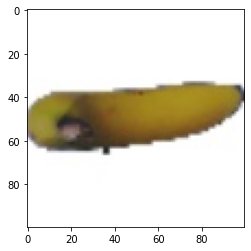

In [11]:
def plot_image(img_path):
    img = cv2.imread(img_path)

    # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Creates the environment 
    # of the picture and shows it
    plt.subplot(1, 1, 1)
    plt.imshow(img_rgb)
    # plt.imshow(img)
    plt.show()
    
plot_image(img_path = os.path.join(train_dir, 'Banana',
                                  os.listdir(os.path.join(train_dir, 'Banana'))[0]
                                  )
          )

# VGG16 - Large-scale CNN (model from "scratch")

In [12]:
n_classes

131

In [99]:
from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense

class vgg16_model:
    def __init__(self,
                 train_data,
                 test_data,
                 n_classes,
                batch_size = 64,
                epochs = 10):
        self.batch_size = batch_size
        self.epochs = epochs
        
        self.train_data = train_data
        self.test_data = test_data
        self.n_classes = n_classes
        
        # instanciate model
        vgg_model =  VGG16()
        vgg_model_layers = vgg_model.layers

        seq_vgg16_model = Sequential()
        for i in range(len(vgg_model_layers)-1):
            seq_vgg16_model.add(vgg_model_layers[i])

        for layers in vgg_model.layers:
            layers.trainable = False

        # adding layers to the quantity of classes we have
        seq_vgg16_model.add(Dense(self.n_classes, 
                                  activation="softmax"))

        seq_vgg16_model.compile(loss="categorical_crossentropy",
                     optimizer="rmsprop",
                     metrics=["accuracy"])
        self.model = seq_vgg16_model
        
    def summary(self):
        self.model.summary()
        
    def train(self):
        self.model_history = self.model.fit_generator(self.train_data,
                           steps_per_epoch=1600//self.batch_size,
                           epochs=self.epochs,
                           validation_data=self.test_data,
                           validation_steps=800//self.batch_size)
    def save_weights(self):
        self.model.save_weights("fruits_and_veggies_vgg16_model.h5")

    def plot_metrics(self):
        
        plt.figure(figsize=(12,6))
        plt.suptitle('Final Accuracy: {:.3f}%'.format(
                        self.model_history.history["accuracy"][-1]*100
                        ),
                     y=1.05,
                     fontsize = 16
                    )
        plt.subplot(2,1,1)
        plt.plot(self.model_history.history["accuracy"],
                 label="training accuracy")
        plt.plot(self.model_history.history["val_accuracy"],
                 label="validation accuracy")
        plt.legend(loc='best',
                  fontsize = 15)

        plt.subplot(2,1,2)
        plt.plot(self.model_history.history["loss"],
                 label="training loss")
        plt.plot(self.model_history.history["val_loss"],
                 label="validation loss")
        plt.legend(loc='best',
                  fontsize = 15)

        plt.tight_layout()
        plt.show()
        
seq_vgg16_model = vgg16_model(epochs=5,
                             train_data=train_data,
                             test_data=test_data,
                             n_classes=n_classes)
seq_vgg16_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## set training and testing data samples

In [100]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator().flow_from_directory(train_dir,
                                                      target_size=(224,224))

test_data = ImageDataGenerator().flow_from_directory(test_dir,
                                                     target_size=(224,224))
train_data

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


## train model

- Usually I would like to train the model with 10 ~ 100 epochs, but to speed train up, I'll use a few epochs.
- By training with 10 epochs, the accuracy increases up to 94% (ref 2).

In [101]:
seq_vgg16_model.train()

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/5
25/25 [==============================] - 297s 12s/step - loss: 5.8277 - accuracy: 0.2512 - val_loss: 2.3811 - val_accuracy: 0.4740
Epoch 2/5
25/25 [==============================] - 292s 12s/step - loss: 1.6495 - accuracy: 0.5750 - val_loss: 1.5955 - val_accuracy: 0.6094
Epoch 3/5
25/25 [==============================] - 287s 12s/step - loss: 0.9133 - accuracy: 0.7362 - val_loss: 1.4810 - val_accuracy: 0.6719
Epoch 4/5
25/25 [==============================] - 283s 11s/step - loss: 0.6257 - accuracy: 0.8275 - val_loss: 1.0762 - val_accuracy: 0.7578
Epoch 5/5
25/25 [==============================] - 298s 12s/step - loss: 0.5545 - accuracy: 0.8425 - val_loss: 1.0632 - val_accuracy: 0.7578


In [103]:
seq_vgg16_model.save_weights()


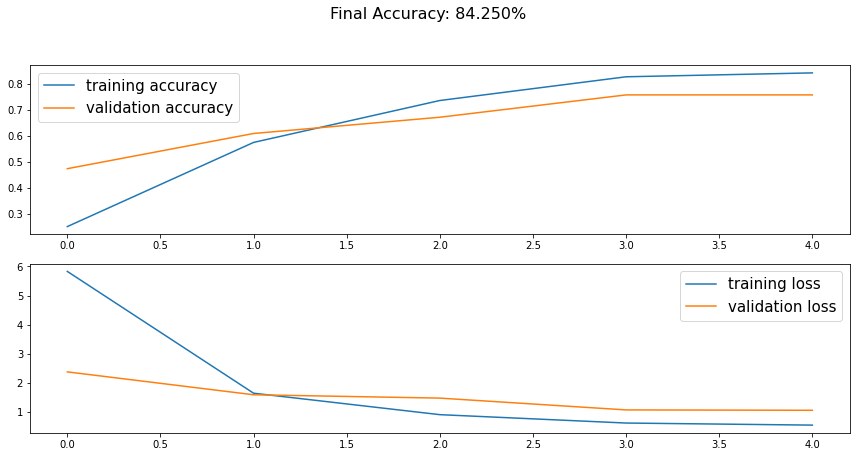

In [102]:
seq_vgg16_model.plot_metrics()

## Inference

In [104]:
d_classes = {img_key: index for (img_key, index) in enumerate(train_data.class_indices)}
# display head
{k:v for k,v in d_classes.items() if k<=5}

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith'}

In [107]:
def inference(image):
    train_shape = train_data[0][0].shape
    
    img = np.zeros(shape = train_shape)
    img[0] = image
    
    prediction = d_classes[
        np.argmax(seq_vgg16_model.model(img))
    ]
    return prediction

In [109]:
# example of prediction
img_path = os.path.join(test_dir, 'Orange',
                                       os.listdir(os.path.join(test_dir, 'Orange'))[0]
                                       )

img = cv2.imread(img_path)
resized_img = cv2.resize(img, 
                         (224,224), 
                         interpolation = cv2.INTER_AREA)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

train_shape = train_data[0][0].shape
    
img = np.zeros(shape = train_shape)
img[0] = resized_img

seq_vgg16_model.model(img)


<tf.Tensor: shape=(32, 131), dtype=float32, numpy=
array([[2.63719284e-03, 1.80593366e-03, 1.75030909e-05, ...,
        1.22967885e-08, 1.13522924e-09, 4.38655168e-10],
       [1.33871567e-03, 5.17013017e-04, 2.35238549e-04, ...,
        1.94202978e-04, 2.69206881e-04, 4.55570203e-04],
       [1.33871567e-03, 5.17013017e-04, 2.35238549e-04, ...,
        1.94202978e-04, 2.69206881e-04, 4.55570203e-04],
       ...,
       [1.33871567e-03, 5.17013017e-04, 2.35238549e-04, ...,
        1.94202978e-04, 2.69206881e-04, 4.55570203e-04],
       [1.33871567e-03, 5.17013017e-04, 2.35238549e-04, ...,
        1.94202978e-04, 2.69206881e-04, 4.55570203e-04],
       [1.33871567e-03, 5.17013017e-04, 2.35238549e-04, ...,
        1.94202978e-04, 2.69206881e-04, 4.55570203e-04]], dtype=float32)>

## Displaying the probability matrix for an example

In [70]:
import plotly.express as px

pred_matrix = seq_vgg16_model(img)
pred = np.argmax(pred_matrix)

fig = px.imshow(np.array(pred_matrix), 
                text_auto=True)
fig.update_layout(
    title = 'Prediction: {}, Actual: {}'.format(
                d_classes[pred],
                'Orange'
            ),
    title_x = 0.25,
    title_y = 0.99,
    coloraxis_colorbar=dict(
        title="Probability",
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(n_classes)),
        ticktext = list(train_data.class_indices.keys())
    ),
    width = 1500,
    height = 500
)
fig.add_annotation(x=pred, y=0,
            text="maximum probability class prediction: {}".format(d_classes[pred]),
            showarrow=True,
            arrowhead=1)

fig.show()

## displaying some predictions for different classes

In [28]:
def plot_prediction(img_path):
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, 
                             (224,224), 
                             interpolation = cv2.INTER_AREA)
    resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
    prediction = inference(resized_img)
    
    plt.title('Prediction: {}'.format(prediction))
    plt.imshow(resized_img)
    plt.show()

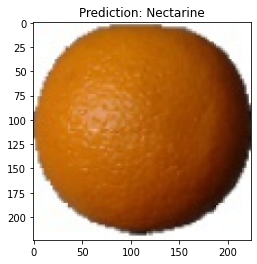

In [111]:
plot_prediction(img_path = os.path.join(test_dir, 'Orange',
                                       os.listdir(os.path.join(test_dir, 'Orange'))[0]
                                       ))

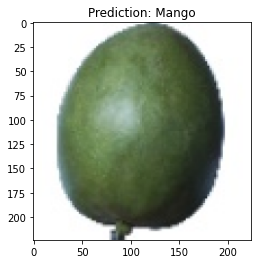

In [112]:
plot_prediction(img_path = os.path.join(test_dir, 'Mango',
                                       os.listdir(os.path.join(test_dir, 'Mango'))[0]
                                       ))

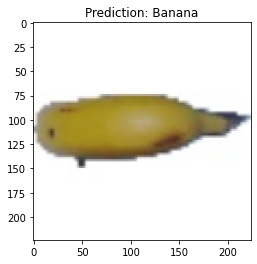

In [58]:
plot_prediction(img_path = os.path.join(test_dir, 'Banana',
                                       os.listdir(os.path.join(test_dir, 'Banana'))[0]
                                       ))

# Pre-trained model

I used the pre-trained tensorflow/tpu/models/official/mask_rcnn (Mask RCNN) model for instance segmentation, to detect fruits and vegetables on images, and display a bounding box with the probability.
This models was trained to detect multiple objects, and it has only a few fruits and vegetables, such as banana, apple, broccoli, orange and carrot.

The code is provided in another notebook, since it the kernel was attached to a Google Colab notebook, using TPU resources: see notebook "Copy of Mask R-CNN Image Segmentation Demo".


Some interesting results will be displayed.

In [4]:
import os
maskrcnn_detections_dir = '../input/detections-images/detections images'
os.listdir(maskrcnn_detections_dir)

['image2.jpg',
 'image1.jpg',
 'image3.jpg',
 'image6.jpg',
 'image4.jpg',
 'image8.jpg',
 'image5.jpg',
 'image7.jpg']

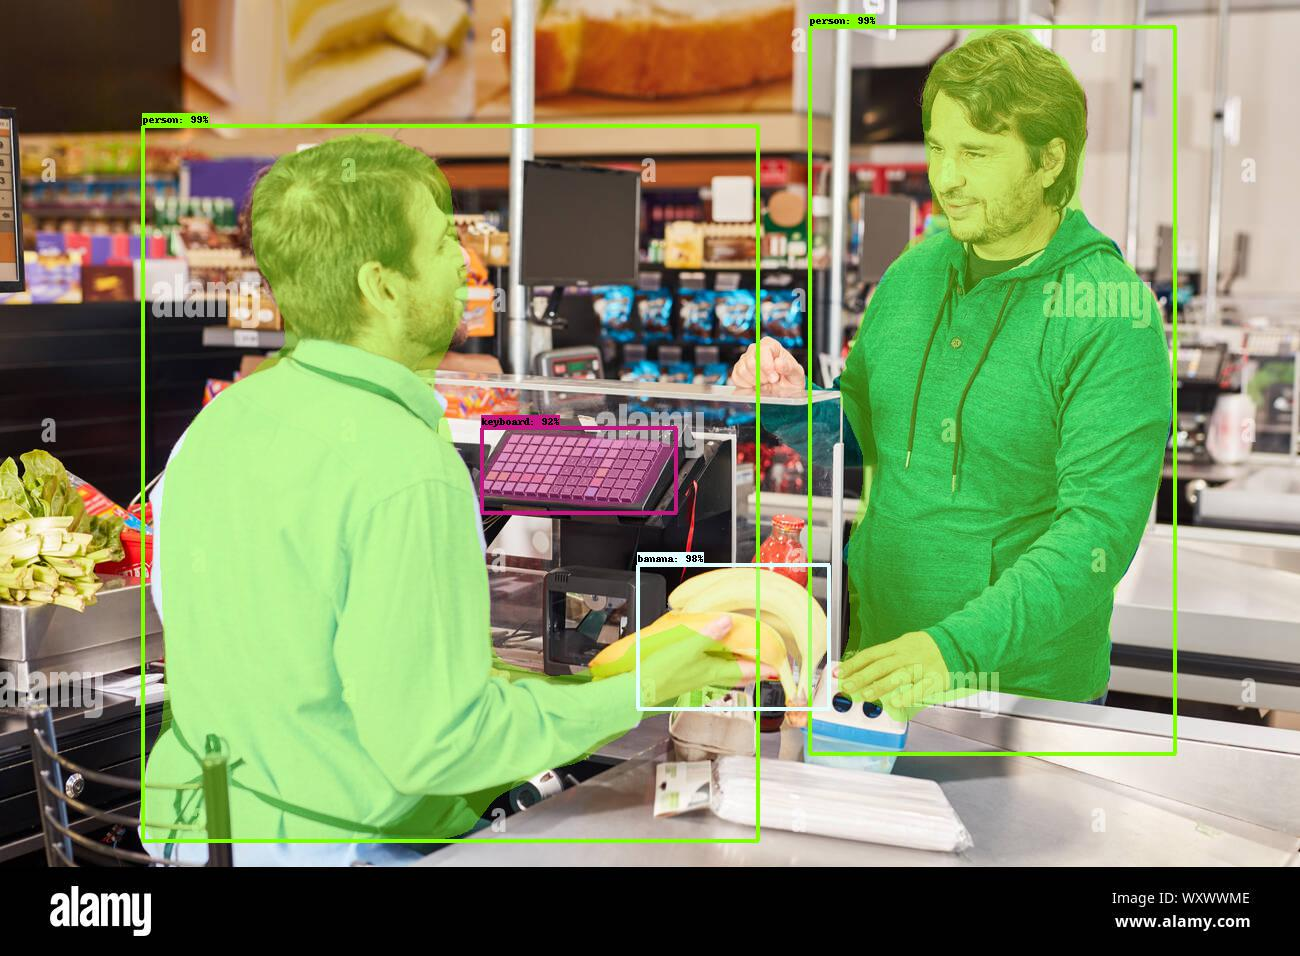

In [11]:
from PIL import Image
from IPython import display

def plot_image2(image_path):
    with open(image_path, 'rb') as f:
        np_image_string = np.array([f.read()])

    image = Image.open(image_path)
    width, height = image.size
    np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

    display.display(display.Image(image_path, width=500))
    
plot_image2(os.path.join(maskrcnn_detections_dir, 'image1.jpg'))

- multiple objects were detected: 
    - humans
    - banana
    - keyboard
 but we are only interested in the fruits and vegetables.
 -> to tackle this problem, obviouly, we could train a mask-RCNN model using only masks of fruits and vegetables. That is, the image can have various objects, but the mask can only identify the classes we want to detect.
 - As an example, below are a few masks I created manually.

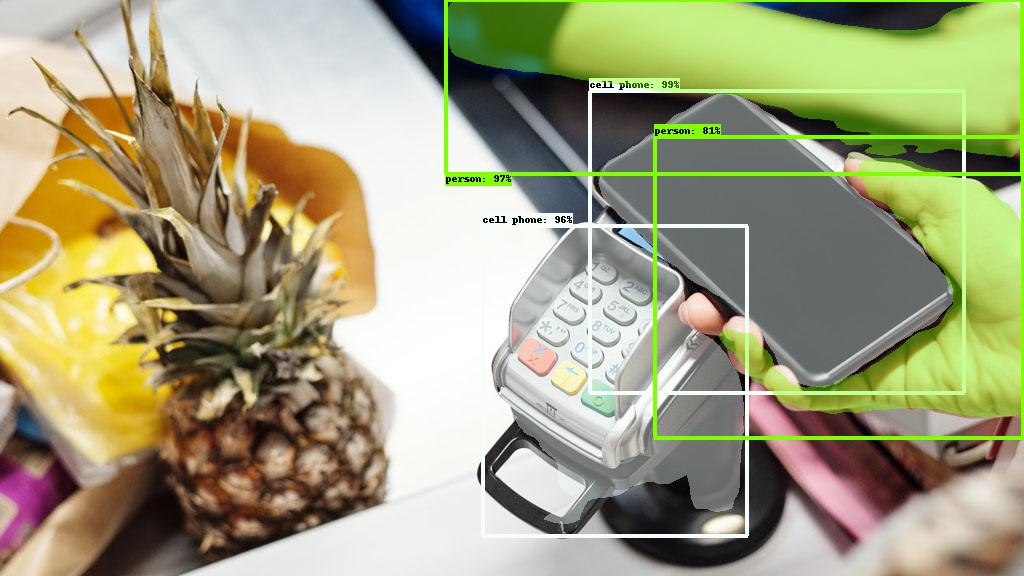

In [12]:
plot_image2(os.path.join(maskrcnn_detections_dir, 'image2.jpg'))

- the pinaple was not detected -> obviously, since it wasn't on the labels of training.

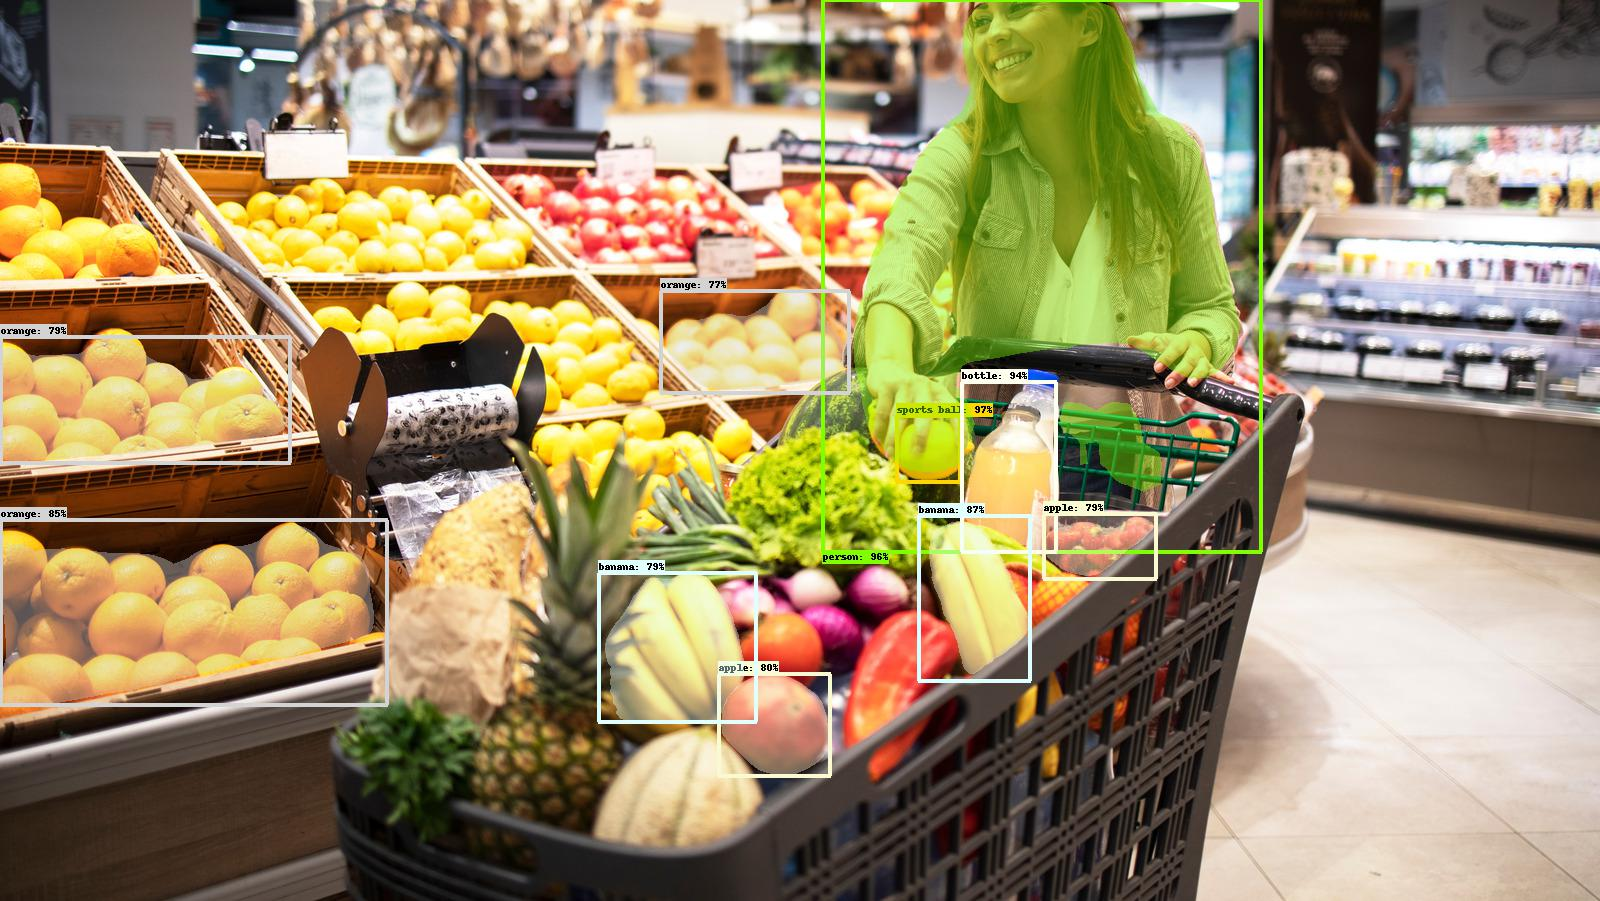

In [13]:
plot_image2(os.path.join(maskrcnn_detections_dir, 'image3.jpg'))

- the model detected groups of oranges.
- strawberries were incorrectly detected as apples.

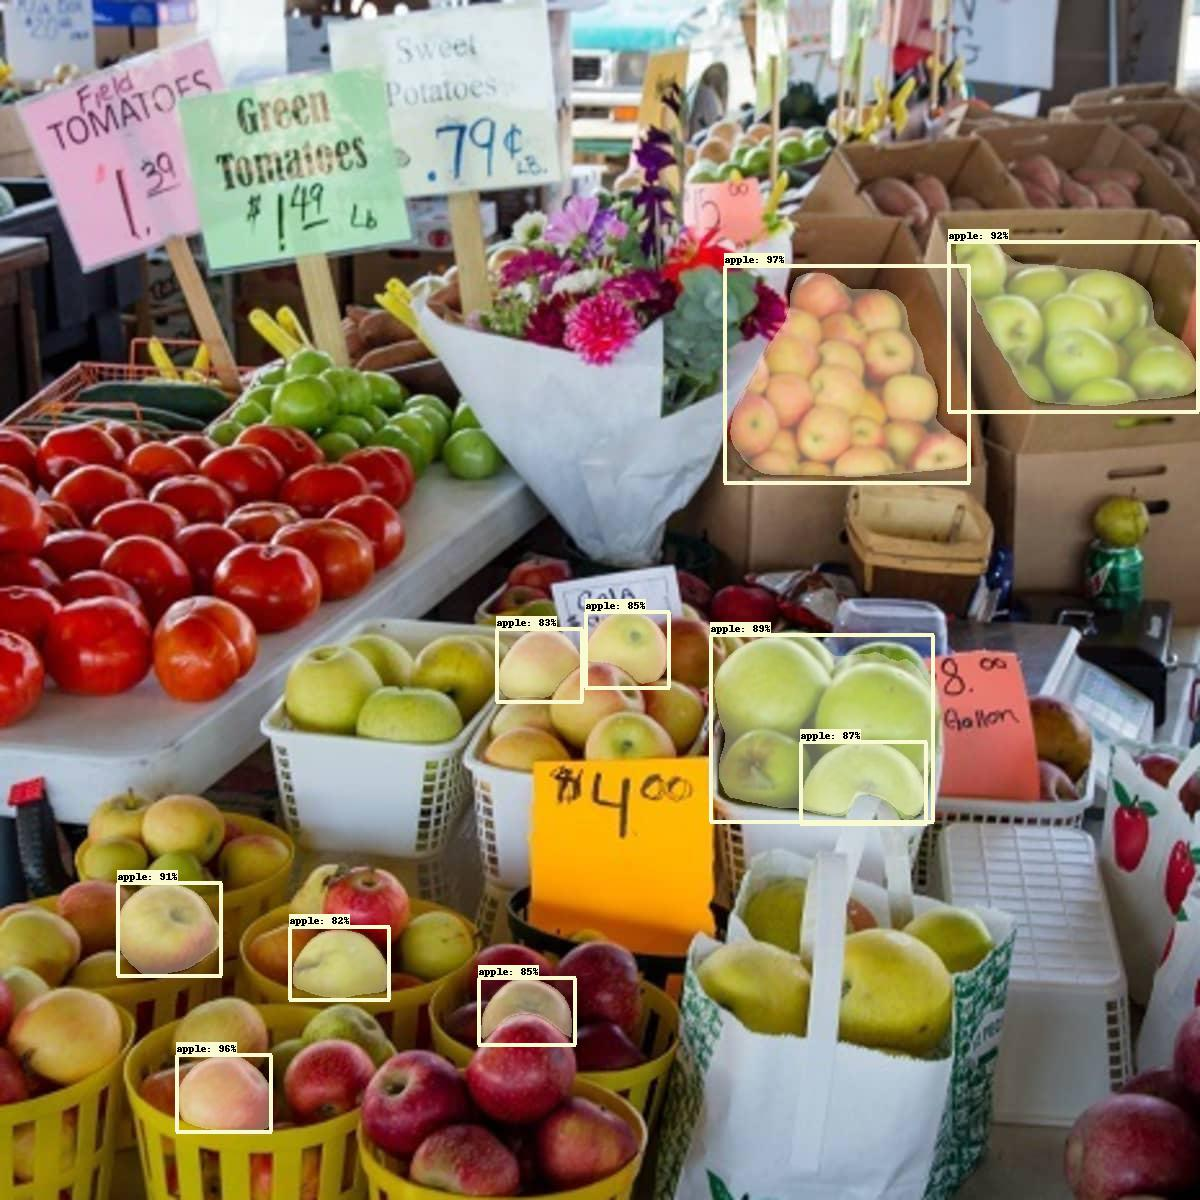

In [14]:
plot_image2(os.path.join(maskrcnn_detections_dir, 'image4.jpg'))

- apples were detected, as a single fruit, or in groups.
- other fruits/objects weren't detected, because they were not training labels.

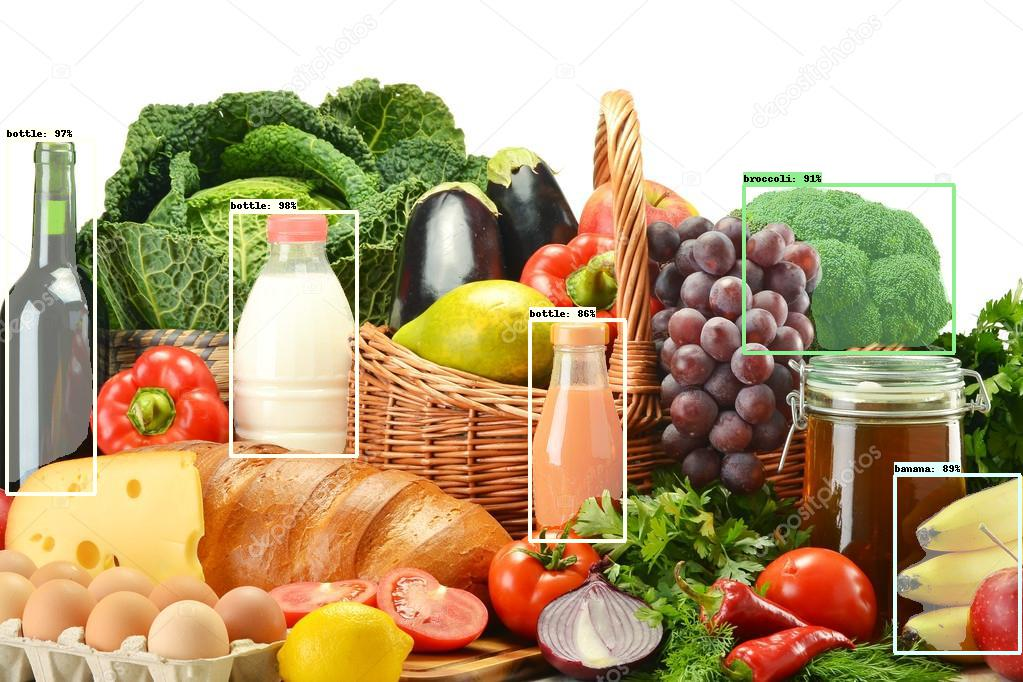

In [15]:
plot_image2(os.path.join(maskrcnn_detections_dir, 'image5.jpg'))

- the broccoli and the banana were correctly detected.
- bottles were detected

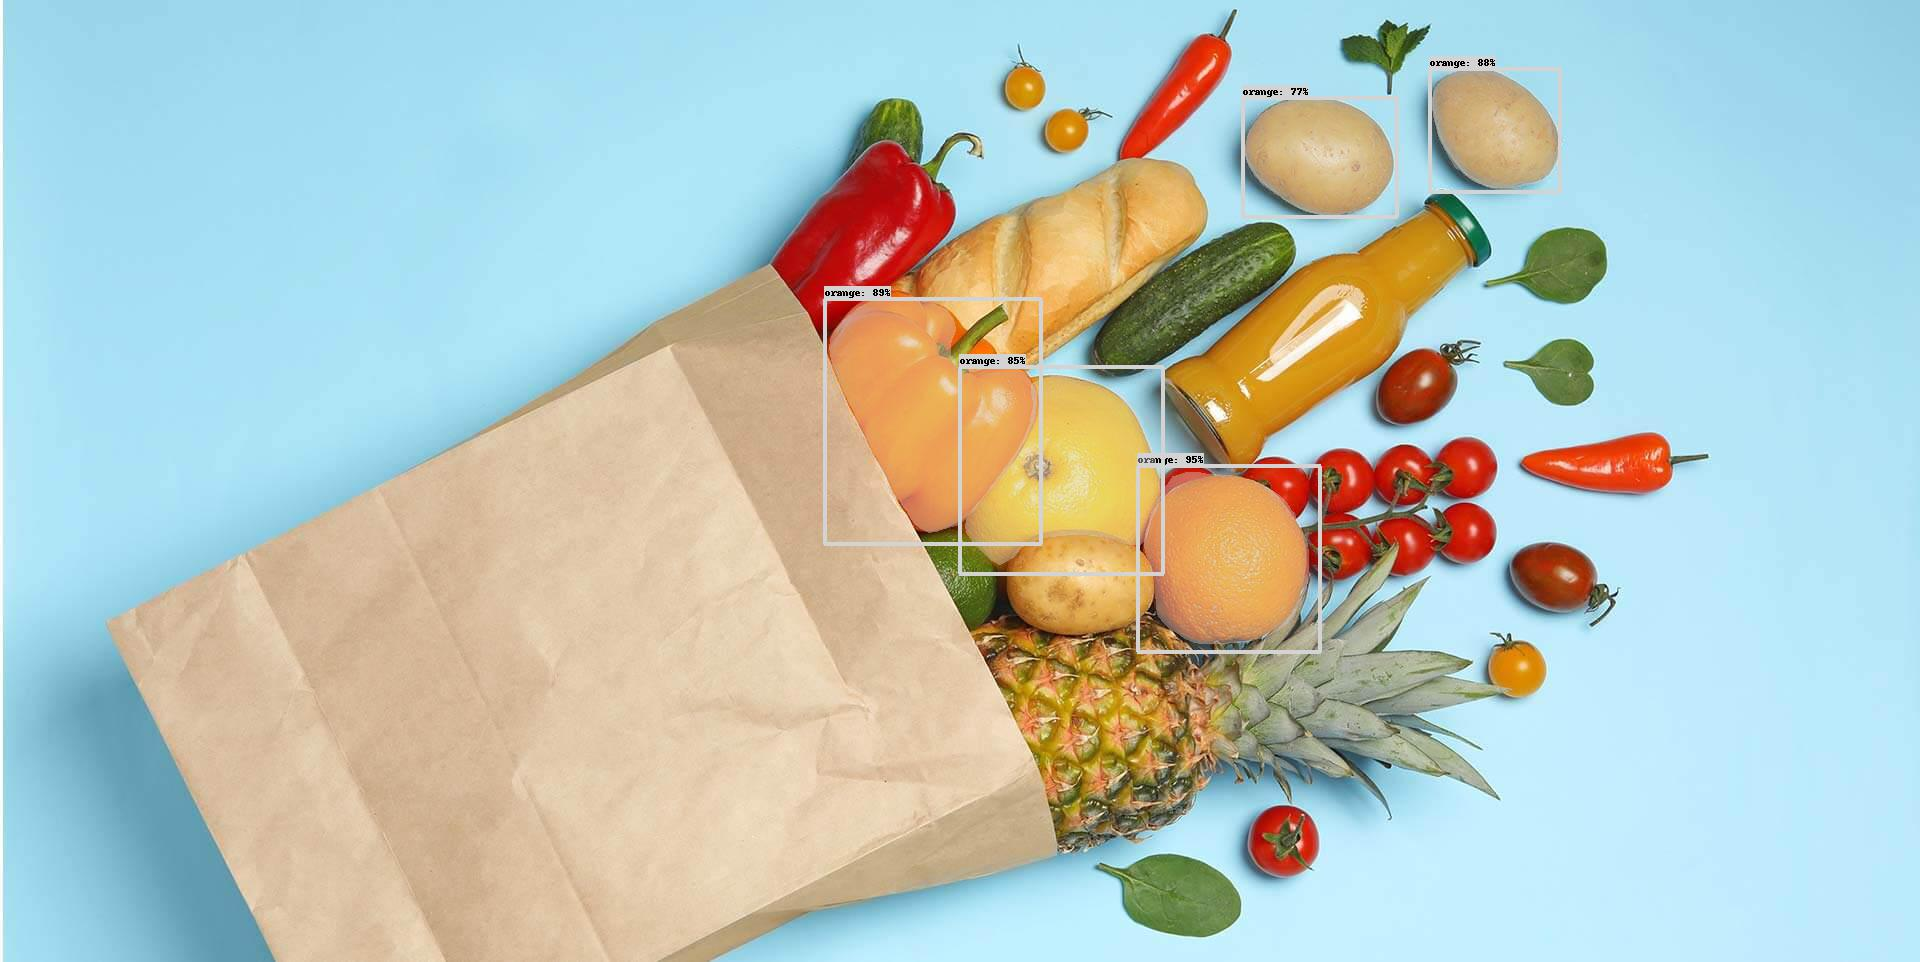

In [17]:
plot_image2(os.path.join(maskrcnn_detections_dir, 'image6.jpg'))

- the pepper was incorrectly detected as an orange, because of its colour, and because peppers are not training labels for this model.

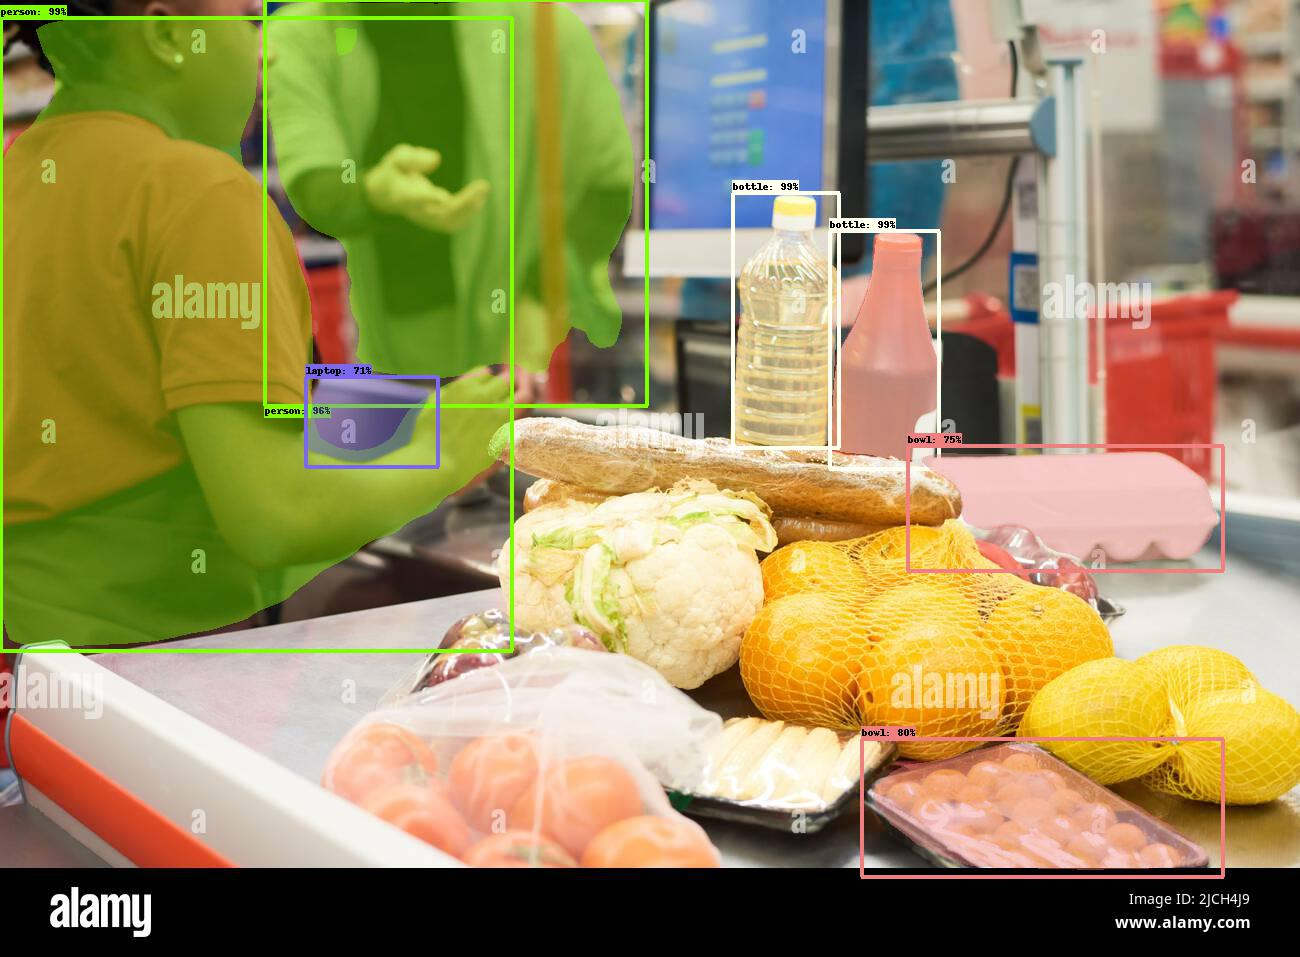

In [18]:
plot_image2(os.path.join(maskrcnn_detections_dir, 'image7.jpg'))

- the cauliflower was not detected.
- the oranges were not detected, probably because of the way they were packaged. 

# Conclusions

- Ideally, to get good results in detecting specifically fruits and vegetables, I would like to train an Instance Segmentation model, such as a mask RCNN, labelling/annotating masks for fruits and vegetables. Possibily, I would create 4 classes: fruit, fruits, vegetable and vegetables, to identify single objects or groups, or even create labels for each kind of fruit/vegetable (broccoli, banana, etc).
